This notebook contains material taught in Keith McCormick's _Machine Learning & AI Foundations : Linear Regression_ course. The course was taught using IBM's SPSS statistical software. I implemented course lessons in Python, as core concepts are generally tool-agnostic, and I wanted to reaffirm my understanding of these concepts. Furthermore, the course syllabus served as a guide as to what other topics I would explore outside of the course.

# Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Source : https://archive.ics.uci.edu/ml/index.php
# contains over 500 datsets for machine learning purposes

# run conda-forge for to retrieve dependencies
first_file = pd.read_spss('Exercise Files/Resources/Auto MPG Modified.sav')

In [3]:
first_file.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,USA,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,USA,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,USA,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,USA,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,USA,ford torino


__Goal__ : Let's predict mpg using the other variables (like weight)(label the colors with the origin variable)

__How__ : Let's draw a scatter plot

Different Types of Data:
    - Scaled
    - Nominal
    - Ordinal

__Regression__ : the search for relationships between observation's independent (inputs, predictors) and dependent (outputs, responses) variables. Used :
 - to show how several variables are related and
 - when wanting to forecast a response.

<img src='CalculatingSlopeAndIntercept.PNG'>

The denominator is read as the sum of X squared, minus the mean of X multiplied by the sum of X. The most efficient way of calculating the sum of X squared in numpy is to calculate the dot product.

In [4]:
denominator = first_file['weight'].dot(first_file['weight']) - np.mean(first_file['weight']) * np.sum(first_file['weight'])

In [5]:
denominator

284704973.23869324

<img src='LinearRegressionExplanation.PNG'>

<img src='CoefficientOfDetermination.PNG'>

__Simple or single-variate linear regression__ is the simplest case of linear regression with a single independent variable. __Multiple or multivariate linear regression__ is a case of linear regression with two or more independent variables.

__Underfitting__ occurs when a model can’t accurately capture the dependencies among data, usually as a consequence of its own simplicity. It often yields a low 𝑅² with known data and bad generalization capabilities when applied with new data.

__Overfitting__ happens when a model learns both dependencies among data and random fluctuations. In other words, a model learns the existing data too well. Complex models, which have many features or terms, are often prone to overfitting. When applied to known data, such models usually yield high 𝑅². However, they often don’t generalize well and have significantly lower 𝑅² when used with new data

In [6]:
def simpleLinearRegressionPlot(predictors, response, xlabel='', ylabel = '', title='', c=None, s=None):
    
    """
    Creates a scatter plot and draws the line of best fit between the predictor and response variables.
    
    xlabel - the string you want displayed on the x-axis
    
    ylabel - the string you want displayed on the y-axis
    
    title - the string to appear as the title of the scatter plot
    
    c - sequence of colors to group observations
    
    s - the scalar that increase the size of the points on the scatter plot
    """
    
    x = np.array(predictors).reshape((-1,1))
    y = response
    
    # represents the regression model
    # calculates the optimal values of the regression coefficients (best predicted weights)
    model = LinearRegression().fit(x,y)
    
    # returns R^2 value
    coefficient_of_determination = model.score(x,y)
    
    # pass in the dependent variable to get the forecasted response
    y_pred = model.predict(x)
    
    # prints R^2 value
    print('coefficient of determination: ', coefficient_of_determination)

    # prints y-intercept value
    print('intercept: ', model.intercept_)

    # prints the slope
    print('slope: ', model.coef_[0])

    fig, ax = plt.subplots()

    # plots the independent variable, weight, and the dependent variable, mpg
    ax.scatter(predictors, response, c=c, s=s)
    
    # plots line of best-fit
    plt.plot(predictors, y_pred, 'r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

coefficient of determination:  0.6917929800341575
intercept:  46.31736442026565
slope:  -0.00767661006392647


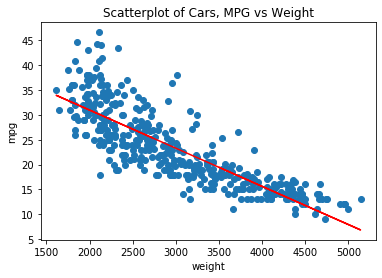

In [7]:
x = first_file['weight']
y = first_file['mpg']
simpleLinearRegressionPlot(x, y, 'weight', 'mpg', 'Scatterplot of Cars, MPG vs Weight')

Source to learn about simple and multiple linear regression : https://realpython.com/linear-regression-in-python/

# Ways to Plot the Scatter Plots to Show the Different Countries 

coefficient of determination:  0.6917929800341575
intercept:  46.31736442026565
slope:  -0.00767661006392647


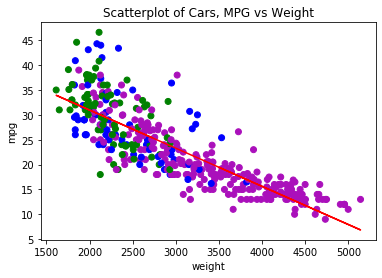

In [8]:
# 1. Use the function created

x = first_file['weight']
y = first_file['mpg']

# colormap
colors = {'USA' : '#AA10BB',
         'Japan' : 'green',
          'Europe' : 'blue'}

simpleLinearRegressionPlot(x, y, 'weight', 'mpg', 'Scatterplot of Cars, MPG vs Weight', first_file['origin'].map(colors))

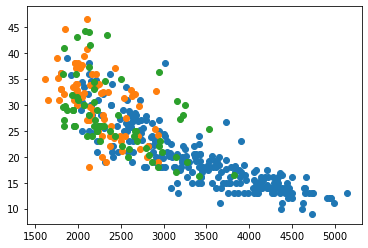

In [9]:
# 2. Use a for-loop

fig, ax = plt.subplots()
for country in first_file['origin'].unique():
    selected_country = first_file[first_file['origin'] == country]
    ax.scatter(selected_country['weight'], selected_country['mpg'])

__Conclusion__ : European and Japanese cars tend to be lights. The heavier cars are American.

# Scatter Plots for Each Country

coefficient of determination:  0.7154511602813305
intercept:  42.99227921626763
slope:  -0.006814161303862454
coefficient of determination:  0.3182160823395399
intercept:  54.2601500605157
slope:  -0.01071907916582082
coefficient of determination:  0.2765081152785299
intercept:  45.375796001306675
slope:  -0.007215106437452277


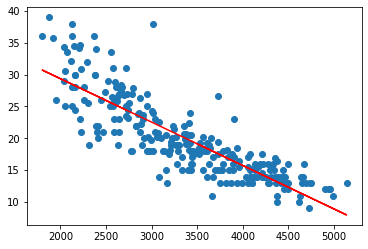

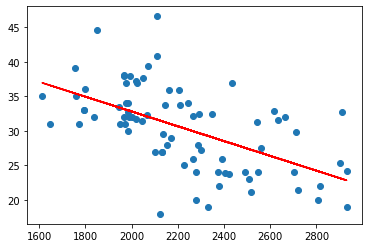

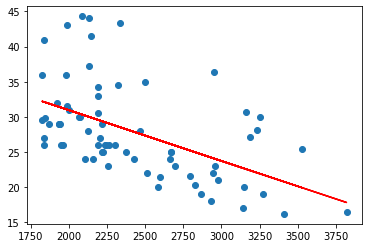

In [10]:
for country in first_file['origin'].unique():
    selected_country = first_file[first_file['origin'] == country]
    simpleLinearRegressionPlot(selected_country['weight'], selected_country['mpg'])

Total variance = variance explained (by regression line) + variance unexplained

r^2 = variance explained / total variance

% variance explained = 100 * (variance explained / total variance)

## Plotting Price vs Horsepower

Let's plot this using a bubble chart, with engine_size adjusting the size of the bubble. Plotly can also be used to create bubble charts with more detailed information (column data can display on hover).

In [11]:
automobile_data = pd.read_spss('Exercise Files/Resources/Auto Imports Scatter.sav')

In [12]:
automobile_data.head(3)

,make,fueltype,aspiration,doors,body,drive,engine_loc,cylinder,engine_size,horsepower,peak_rpm,city_mpg,hwy_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,four,130.0,111.0,5000.0,21.0,27.0,13495.0
1,audi,gas,std,four,sedan,fwd,front,four,109.0,102.0,5500.0,24.0,30.0,13950.0
2,bmw,gas,std,two,sedan,rwd,front,four,108.0,101.0,5800.0,23.0,29.0,16430.0


coefficient of determination:  0.7697315921021158
intercept:  44.68601584431273
slope:  0.004270471846124522


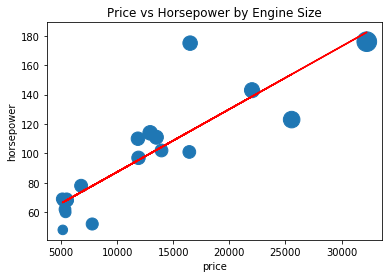

In [13]:
x_col = 'price'
y_col = 'horsepower'
size_col = 'engine_size'
title_formatting = '%s vs %s by %s' % (x_col.capitalize(), y_col.capitalize(), 'Engine Size')

simpleLinearRegressionPlot(automobile_data[x_col], 
                           automobile_data[y_col], 
                           xlabel=x_col, 
                           ylabel=y_col, 
                           title = title_formatting, 
                           s=automobile_data[size_col]*1.5)

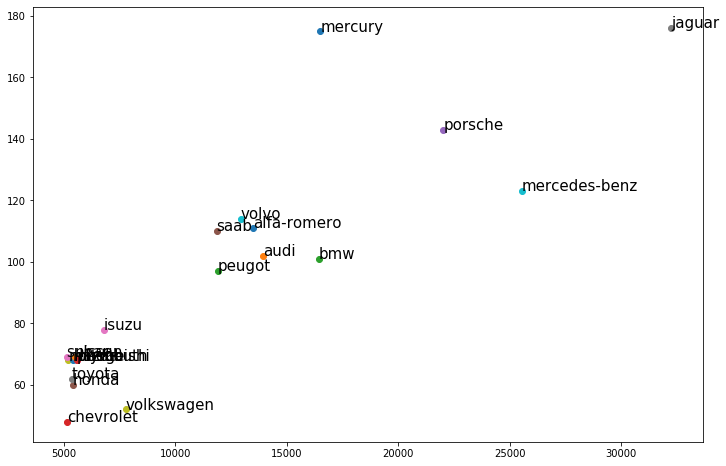

In [14]:
# 2. Use a for-loop

fig, ax = plt.subplots(figsize=(12,8))
for make in automobile_data['make'].unique():
    selected_country = automobile_data[automobile_data['make'] == make]
    ax.scatter(selected_country[x_col], selected_country[y_col])
    text = ax.annotate(make, (selected_country[x_col], selected_country[y_col]))
    text.set_fontsize(15)

__To be continued__

R^2
Slope
Intercept

In [15]:
# bank dataset where employees sued regarding fairness and pay
mw_bank = pd.read_spss('Exercise Files/Resources/Case Study Data/MWBank.sav')

In [16]:
mw_bank.head()

,id,salbeg,sex,time,age,salnow,edlevel,work,jobcat,minority
0,697.0,16992.0,Males,85.0,43.0,27700.0,20.0,11.17,Technical,White
1,943.0,6300.0,Females,90.0,29.0,15120.0,16.0,0.58,College Trainee,White
2,1030.0,7800.0,Females,65.0,30.0,13764.0,16.0,6.58,College Trainee,White
3,777.0,9492.0,Males,78.0,38.0,15480.0,15.0,14.67,Exempt Employee,White
4,950.0,21000.0,Males,83.0,49.0,26700.0,16.0,21.50,Technical,White


# Multiple Linear Regression

In [17]:
# two observations did not have a values for sex, and were removed from the regression analysis
mw_bank_refined = mw_bank[mw_bank['sex'].notna()]

In [18]:
# dependent variables
beginning_salary_list = np.array(mw_bank_refined['salbeg']).reshape((-1,1))

# two independent variables
education_level_list = mw_bank_refined['edlevel'].tolist()
sex_list = mw_bank_refined['sex'].apply(lambda gender : 0 if gender == "Males" else 1).tolist()

# there will be two slopes that appear in the coefficients section
# the first slope will be education_level_list and the second level will be the sex
combined_list = [list(a) for a in zip(education_level_list, sex_list)]
combined_array = np.array(combined_list)

In [19]:
model = LinearRegression().fit(combined_array, beginning_salary_list)

In [20]:
r_sq = model.score(combined_array, beginning_salary_list)
print('coefficient of determination: ', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination:  0.46312905699604434
intercept: [-433.30598847]
slope: [[  592.77382354 -1655.90830381]]


In [21]:
y_pred = model.predict(combined_array)

Conclusion : There was evidence there was bias in pay

## Assumptions of Multiple Linear Regression with OLS

__Multiple Linear Regression__: when we have one dependent variable but multiple independent variables

<img src='SpecificationErrors.png'>

## Summary

1. Put all the relevant variables in the model
 - Check to see if the residuals plot shows a random pattern. (This is what we want).
 - Check for the presence of interactions.
2. Leave the irrelevant variables out
 - Check for the significance of each independent variable(IV) and check the partial plots for each IV
3. Need linear relationships
 - Use curve estimation and scatter plots to diagnose. Consder squaring one of the IVs. Add this new variable to the model.
4. Residuals have a mean of zero
5. Normality of Errors
 - Run Levene's test (or KS test) before building the model to check for normality of IV
 - check for the normality of residuals after building
 - check the mean error of the residuals (mean of zero)
6. Multicollinearity
 - correlation matrix before building model
 - collinearity diagnostics after you model (variance inflation factor and tolerance)
7. Serial autocorrelation (time series data)
8. Durbin-Watson test
 - Time Series forecasting might be better than linear regression?

_Regression Assumptions_
 - Residuals have a mean of zero (after running regression model)
 - Normality of errors (independent variables don't necessarily have to be normally distributed)
 - Residuals are not autocorrelated (Durbin-Watson, usually associated with time series data)
 - Need linear relationships
 - need more data than variables
 - No _excessive_ multicollinearity

_Challenges of Multiple Regression (that didn't arise from simple linear regression)_
 - Visual Examination becomes more difficult (can't really see all variables in a single scatter plot)
 - multicollinearity (when independent variables are correlated with each other)
 - Interactions
 - Attributing importance to each variable
 - Juggling multiple problems at once (several variables have outliers)

## Checking Assumptions Visually

In [22]:
# dataset with amounts of municipal waste in tons, with land utilization
# let's predict the amount of municipal waste each year based on how the land is used
waste = pd.read_spss('Exercise Files/Resources/Case Study Data/Waste.sav')

In [23]:
waste.head()

,indust,metals,trucks,retail,restrnts,waste_tons
0,102.0,69.0,133.0,125.0,36.0,357400.0
1,1220.0,723.0,2616.0,953.0,132.0,1967300.0
2,139.0,138.0,46.0,35.0,6.0,186200.0
3,221.0,637.0,153.0,115.0,16.0,381600.0
4,12.0,0.0,1.0,9.0,1.0,151200.0


In [24]:
industrial_land = waste['indust']
waste_in_tons = waste['waste_tons']

coefficient of determination:  0.03443022466034018
intercept:  356591.645717393
slope:  41.906578782946106


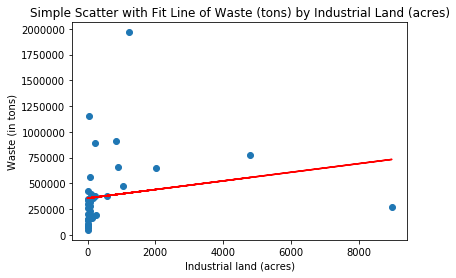

In [25]:
simpleLinearRegressionPlot(industrial_land, waste_in_tons, 
                           'Industrial land (acres)', 
                           'Waste (in tons)', 
                           'Simple Scatter with Fit Line of Waste (tons) by Industrial Land (acres)')

__Assumptions broken__
 - Variables are not normally distributed.
  - There are many points on the left. Not many points in the middle. Normality is violated.
 - No linear relationships.
  - There's a congregation of points stacked vertically
  
Note : Points of Industrial Land past 4000 seemed to pull the regression line in their direction. The regression line would appear to be more steep, otherwise.

In [26]:
waste.head()

,indust,metals,trucks,retail,restrnts,waste_tons
0,102.0,69.0,133.0,125.0,36.0,357400.0
1,1220.0,723.0,2616.0,953.0,132.0,1967300.0
2,139.0,138.0,46.0,35.0,6.0,186200.0
3,221.0,637.0,153.0,115.0,16.0,381600.0
4,12.0,0.0,1.0,9.0,1.0,151200.0


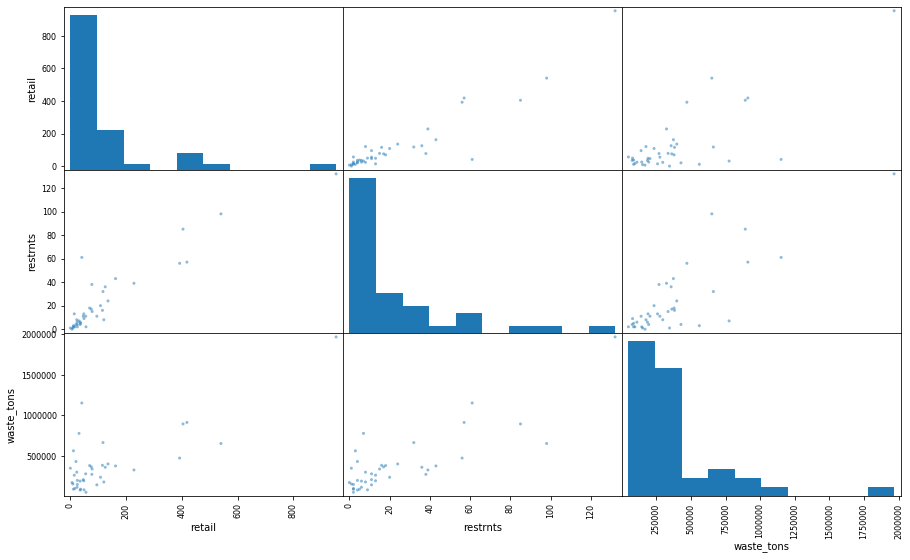

In [27]:
pd.plotting.scatter_matrix(waste[['retail','restrnts','waste_tons']], figsize=(15,9));

__Observations:__
 - Restaurants and Retail land usage are more closely associated with each other than either of these independent variables are correlated with waste_tons.

In [28]:
waste.describe()

,indust,metals,trucks,retail,restrnts,waste_tons
count,40.000000,40.000000,40.00000,40.000000,40.000000,4.000000e+01
mean,561.925000,148.875000,312.30000,120.700000,23.000000,3.801400e+05
std,1600.440651,371.798001,708.80648,184.541177,29.323133,3.614530e+05
min,0.000000,0.000000,1.00000,0.000000,0.000000,4.860000e+04
25%,4.750000,1.000000,24.75000,24.750000,4.000000,1.644000e+05
50%,70.500000,35.500000,92.50000,52.000000,11.000000,2.865500e+05
75%,224.000000,112.250000,248.25000,117.750000,33.000000,4.057500e+05
max,8983.000000,2046.000000,3719.00000,953.000000,132.000000,1.967300e+06


In [29]:
waste.describe().loc[['mean', '50%'], 'indust']

mean    561.925
50%      70.500
Name: indust, dtype: float64

__Observations:__
 - From the descriptive statistics, we can see industrial land is skewed because the mean is a magnitude larger than the mean.

__Note:__ can also create stem-and-leaf plots to explore data further

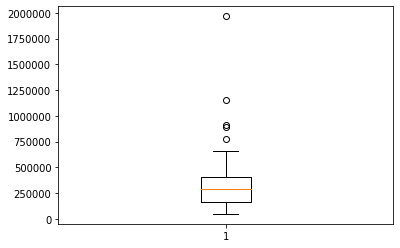

In [30]:
# box plot of waste in tons
plt.boxplot(waste['waste_tons']);

## Durbin Watson

 - A test to check for autocorrelation (aka serial correlation) in the residuals
 - Typically a problem with stock data or economic data
 - A value of 2 means no autocorrelation
 - A value between 1.5 and 2.5 is ideal
 - Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation.
 - Investopedia Example - A stock price displaying positive autocorrelation would indicate that the price yesterday has a positive correlation on the price today—so if the stock fell yesterday, it is also likely that it falls today. A security that has a negative autocorrelation, on the other hand, has a negative influence on itself over time—so that if it fell yesterday, there is a greater likelihood it will rise today. In order to avoid autocorrelation issues, the easiest solution in finance is to simply convert a series of historical prices into a series of percentage-price changes from day to day.
  - when lagged dependent variables are included in the explanatory variables, then it is inappropriate to use this test.

In [31]:
# statsmodels also has a way to calculate this statistic quickly
# from statsmodels.regression.linear_model import OLS

In [32]:
def calcDurbinWatsonStatistic(predictors,response):
    x = np.array(predictors).reshape((-1,1))
    y = response
    
    # represents the regression model
    # calculates the optimal values of the regression coefficients (best predicted weights)
    model = LinearRegression().fit(x,y)
    
    # pass in the dependent variable to get the forecasted response
    y_pred = model.predict(x)
    
    # the differences of the actual "y" values versus the expected "y" values, the errors, are calculated
    errors = response - y_pred
    
    # the errors are squared and summed
    squared_and_summed = np.sum(errors**2)
    
    # the value of the error minus the previous error are calculated
    error_difference = errors - errors.shift(1)
    
    # square the differences and then sum them
    sum_of_difference_squared = np.sum(error_difference**2)
    
    # then they are summed
    return sum_of_difference_squared / squared_and_summed

In [33]:
original_example_data = [(10,1100),(20,1200),(35,985),(40,750),(50,1215),(45,1000)]
example_df = pd.DataFrame(original_example_data, columns=['predictors','response'])
calcDurbinWatsonStatistic(example_df['predictors'], example_df['response'])

2.774069071361063

## Levene's Test (Kolmogorov-Smirnov test)

 - to check for normality
 - not only for regression
 - 0 means we reject the null hypothesis the assumption was met
 - Kolmogorov-Smirnov(KS) test(more common) vs Shapiro-Wilk(alternative version)
 - When viewing a normal Q-Q(Quartile-Quartile) plot, the data points would fall on the line if the data were normally distributed
 - In real-world projects, proceed to the next step, but proceed with caution

In [34]:
from scipy.stats import kstest

In [35]:
# returns the test statistic and p-value for the Kolmogorov-Smirnov test which is used to test whether 
# or not or not a sample comes from a certain distribution.
kstest(waste['indust'],'norm')

KstestResult(statistic=0.8272498680518208, pvalue=9.262203358104046e-31)

In [36]:
# prints whether the independent variables come from a normal distribution using the Kolmogorov-Smirnov test
def normalDistributionReport(df):
    for col in df.columns:
        result = kstest(df[col], 'norm')
        yes_no = 'bob'
        # reject the null hypothesis that the data came from a normal distribution
        if result[1] < .05:
            yes_no = 'no'
        else:
            yes_no = 'yes'
        print("Test statistics is %s. The p-value is %s. Is the data normally distributed: %s" % (result[0], result[1], yes_no))

In [37]:
normalDistributionReport(waste)

Test statistics is 0.8272498680518208. The p-value is 9.262203358104046e-31. Is the data normally distributed: no
Test statistics is 0.6772498680518209. The p-value is 1.0806432759499155e-18. Is the data normally distributed: no
Test statistics is 0.9522498680518208. The p-value is 2.884118073896372e-53. Is the data normally distributed: no
Test statistics is 0.9749999990134123. The p-value is 1.6543638365840226e-64. Is the data normally distributed: no
Test statistics is 0.9022498680518208. The p-value is 8.078177860533307e-41. Is the data normally distributed: no
Test statistics is 1.0. The p-value is 0.0. Is the data normally distributed: no


### Q-Q Plot Visualization

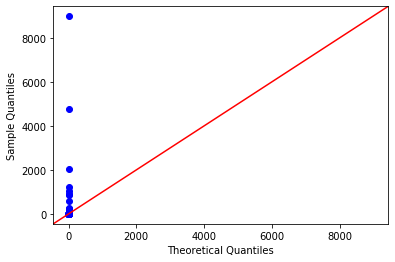

In [38]:
sm.qqplot(waste['indust'], line='45')
plt.show()

In [39]:
# if the data was normally distributed, the results would've fallen on the line.

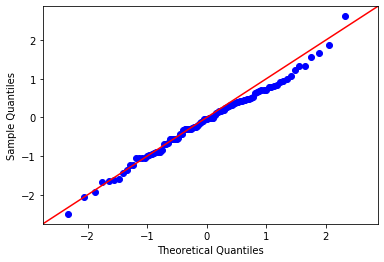

In [40]:
# this is what the Q-Q plot of a roughly normal distribution would look like
data_points = np.random.normal(0,1,100)
sm.qqplot(data_points, line='45')
plt.show()

## Correlation Matrix

In [41]:
# returns the correlation matrix
waste.corr()

,indust,metals,trucks,retail,restrnts,waste_tons
indust,1.000000,0.393163,0.423561,0.137772,0.233448,0.185554
metals,0.393163,1.000000,0.892612,0.281951,0.198881,0.483217
trucks,0.423561,0.892612,1.000000,0.467130,0.384050,0.643409
retail,0.137772,0.281951,0.467130,1.000000,0.919851,0.767578
restrnts,0.233448,0.198881,0.384050,0.919851,1.000000,0.822864
waste_tons,0.185554,0.483217,0.643409,0.767578,0.822864,1.000000


In [42]:
# r^2 values
waste.corr()**2

,indust,metals,trucks,retail,restrnts,waste_tons
indust,1.000000,0.154577,0.179404,0.018981,0.054498,0.034430
metals,0.154577,1.000000,0.796756,0.079496,0.039554,0.233498
trucks,0.179404,0.796756,1.000000,0.218210,0.147494,0.413975
retail,0.018981,0.079496,0.218210,1.000000,0.846127,0.589175
restrnts,0.054498,0.039554,0.147494,0.846127,1.000000,0.677105
waste_tons,0.034430,0.233498,0.413975,0.589175,0.677105,1.000000


Squaring these coefficients would yield the r^2 values for running linear regression between each of the variables

__Observations__ : Strongest correlation with waste tons is restaurants. Second-best predictor is retail trade. Weakest predictor is industrial land. Trucking and fabricated metals are highly correlated (multi-collinearity problem). This means the information in trucking is redundant with the metals information. Retail and restaurants are also highly correlated. We don't know how these variables will interact with each other during a multiple linear regression.

## Residuals Plot

In [43]:
mw_bank.columns

Index(['id', 'salbeg', 'sex', 'time', 'age', 'salnow', 'edlevel', 'work',
       'jobcat', 'minority'],
      dtype='object')

In [44]:
model = ols('salbeg ~ edlevel', data=mw_bank).fit()

In [45]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salbeg   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     315.9
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.76e-54
Time:                        17:00:08   Log-Likelihood:                -4368.5
No. Observations:                 474   AIC:                             8741.
Df Residuals:                     472   BIC:                             8749.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2516.3869    536.368     -4.692      0.0

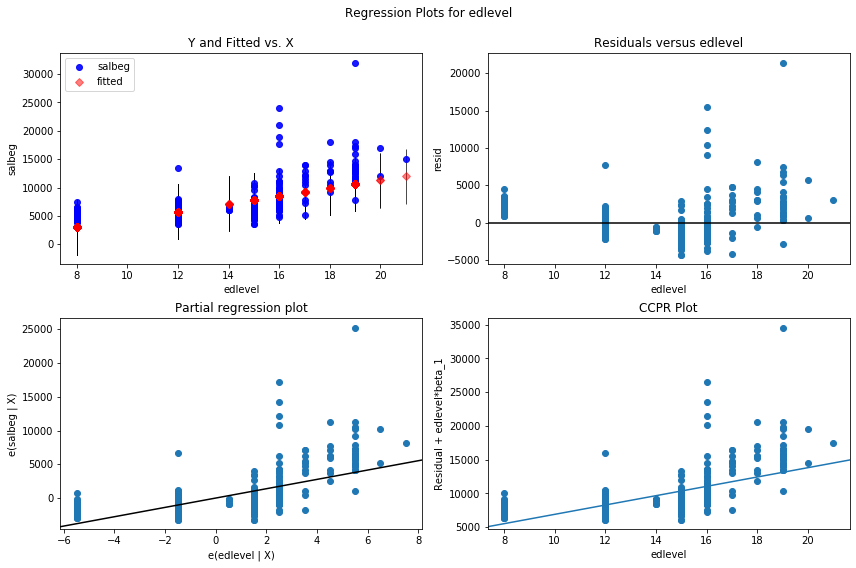

In [46]:
fig = plt.figure(figsize=(12,8))

# the regressor refers to the independent variable
fig = sm.graphics.plot_regress_exog(model, 'edlevel', fig=fig)

__Observations__: Look at the graph in the bottom left hand corner. If this was a symmetric residuals plot, we'd have a large cluster of dots around zero (average error). This shows our residuals are heteroskedastic. There's something systematic about the errors.

# Dummy Code and Interaction Terms

## Dummy Code

An issue that happens in the majority of regressions. Occurs when you have a categorical variable. You can't feed this directly into your regression. If you have 4 categories, you have to create 4 new variables (marked true and false, or 1 and 0, respectively).

When dummy coding and running the regressions, leave one dummy variable out (otherwise, you'll have perfect multicollinearity). The beta of the constant represents the dummy variable left out. The other beta values are in relation to this dummy variable.

In [47]:
mw_bank_w_dummies = pd.get_dummies(mw_bank, columns=['jobcat'])

In [48]:
mw_bank_w_dummies.head()

,id,salbeg,sex,time,age,salnow,edlevel,work,minority,jobcat_Clerical,jobcat_College Trainee,jobcat_Exempt Employee,jobcat_MBA Trainee,jobcat_Office Trainee,jobcat_Security Officer,jobcat_Technical
0,697.0,16992.0,Males,85.0,43.0,27700.0,20.0,11.17,White,0,0,0,0,0,0,1
1,943.0,6300.0,Females,90.0,29.0,15120.0,16.0,0.58,White,0,1,0,0,0,0,0
2,1030.0,7800.0,Females,65.0,30.0,13764.0,16.0,6.58,White,0,1,0,0,0,0,0
3,777.0,9492.0,Males,78.0,38.0,15480.0,15.0,14.67,White,0,0,1,0,0,0,0
4,950.0,21000.0,Males,83.0,49.0,26700.0,16.0,21.50,White,0,0,0,0,0,0,1


In [49]:
mw_bank_w_dummies.rename(columns = {'jobcat_College Trainee' : 'jobcat_College_Trainee',
                                   'jobcat_Exempt Employee' : 'jobcat_Exempt_Employee',
                                   'jobcat_MBA Trainee' : 'jobcat_MBA_Trainee',
                                   'jobcat_Office Trainee' : 'jobcat_Office_Trainee',
                                   'jobcat_Security Officer' : 'jobcat_Security_Officer'}, inplace=True)

In [50]:
# using all, but one, of the dummy variables (leaving out jobcat_Technical)
model = ols("salbeg ~ jobcat_Clerical + jobcat_College_Trainee + jobcat_Exempt_Employee + jobcat_MBA_Trainee + jobcat_Office_Trainee + jobcat_Security_Officer", 
            mw_bank_w_dummies).fit()

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salbeg   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     224.6
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          3.40e-134
Time:                        17:00:09   Log-Likelihood:                -4168.3
No. Observations:                 474   AIC:                             8351.
Df Residuals:                     467   BIC:                             8380.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

__Observation__ : 2000 (2e+04) for the coefficient of the intercept represents the salary of the tech folks (technically, it refers to the jobcat_Technical variable we left out). Since all of the other dummy variables are associated with negative coefficients, we know the tech workers get paid the most.

## Interaction Terms

In [52]:
color = {'Males':'blue',
        'Females':'red'}

Gender:  Males
coefficient of determination:  0.39059287903590484
intercept:  -2912.081249012421
slope:  764.5503524698374
Gender:  Females
coefficient of determination:  0.23363555130063765
intercept:  2202.1388547828997
slope:  246.0959928563456


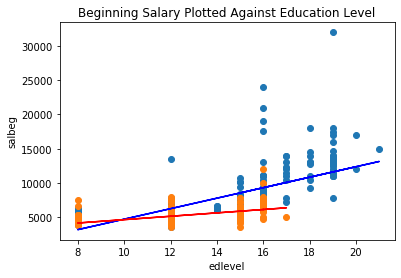

In [53]:
# 2. Use a for-loop

fig, ax = plt.subplots()
for gender in mw_bank_refined['sex'].unique():
    selected_gender = mw_bank_refined[mw_bank_refined['sex'] == gender]
    
    x = np.array(selected_gender['edlevel']).reshape((-1,1))
    y = selected_gender['salbeg']
    
    # represents the regression model
    # calculates the optimal values of the regression coefficients (best predicted weights)
    model = LinearRegression().fit(x,y)
    
    # returns R^2 value
    coefficient_of_determination = model.score(x,y)
    
    # pass in the dependent variable to get the forecasted response
    y_pred = model.predict(x)
    
    # prints which of the unique values we're looking at
    print("Gender: ", gender)
    
    # prints R^2 value
    print('coefficient of determination: ', coefficient_of_determination)

    # prints y-intercept value
    print('intercept: ', model.intercept_)

    # prints the slope
    print('slope: ', model.coef_[0])
    
    ax.scatter(selected_gender['edlevel'], selected_gender['salbeg'])
    
    
    # plots line of best-fit
    plt.plot(selected_gender['edlevel'], y_pred, 'r', color = color[gender])
    plt.xlabel('edlevel')
    plt.ylabel('salbeg')
    plt.title('Beginning Salary Plotted Against Education Level')

__Observation__ : There's an interaction when the slope of the blue line is not the same as the slope of the red line. The gap between the lines are not uniform. The impact of education on salary depends on another variable, sex.

### Creating and Testing Interaction Terms

Create another variable that multiplies education and sex. This will be highly correlated with the education variable. An approach to this problem is called "centering."

In [54]:
mw_bank_refined['educ_cen'] = mw_bank_refined['edlevel'] - np.average(mw_bank_refined['edlevel'])

C:\Users\leona\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
mw_bank_refined['sex_num'] = mw_bank_refined['sex'].apply(lambda gender : 0 if gender == "Males" else 1).astype(int)

C:\Users\leona\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
mw_bank_refined['ed_sex'] = mw_bank_refined['educ_cen'] * mw_bank_refined['sex_num']

C:\Users\leona\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
mw_bank_refined.head()

,id,salbeg,sex,time,age,salnow,edlevel,work,jobcat,minority,educ_cen,sex_num,ed_sex
0,697.0,16992.0,Males,85.0,43.0,27700.0,20.0,11.17,Technical,White,6.5,0,0.0
1,943.0,6300.0,Females,90.0,29.0,15120.0,16.0,0.58,College Trainee,White,2.5,1,2.5
2,1030.0,7800.0,Females,65.0,30.0,13764.0,16.0,6.58,College Trainee,White,2.5,1,2.5
3,777.0,9492.0,Males,78.0,38.0,15480.0,15.0,14.67,Exempt Employee,White,1.5,0,0.0
4,950.0,21000.0,Males,83.0,49.0,26700.0,16.0,21.50,Technical,White,2.5,0,0.0


In [58]:
model = ols("salbeg ~ educ_cen + sex_num + ed_sex", mw_bank_refined).fit()

In [59]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salbeg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     160.2
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.98e-71
Time:                        17:00:10   Log-Likelihood:                -4304.5
No. Observations:                 472   AIC:                             8617.
Df Residuals:                     468   BIC:                             8634.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7409.3485    144.771     51.180      0.0

__Observation__ : We created an interaction variable, ed_sex, which was found to be significant, given a p-value of close to zero. We have now confirmed in the regression output what we saw in the scatterplot.

## Three Regression Strategies

1. Hierarchical
2. Simultaneous
3. Stepwise

<img src='ThreeRegressionStrategies.PNG'>

### Understanding partial correlations

In [60]:
# looking at retail-waste and restaurants-waste
waste.corr()

,indust,metals,trucks,retail,restrnts,waste_tons
indust,1.000000,0.393163,0.423561,0.137772,0.233448,0.185554
metals,0.393163,1.000000,0.892612,0.281951,0.198881,0.483217
trucks,0.423561,0.892612,1.000000,0.467130,0.384050,0.643409
retail,0.137772,0.281951,0.467130,1.000000,0.919851,0.767578
restrnts,0.233448,0.198881,0.384050,0.919851,1.000000,0.822864
waste_tons,0.185554,0.483217,0.643409,0.767578,0.822864,1.000000


In [61]:
import pingouin as pg

In [62]:
pg.partial_corr(waste, x='restrnts',y='waste_tons',covar='retail')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,0.464576,"[0.18, 0.68]",0.215831,0.173443,0.002527,16.039,0.871465


In [63]:
pg.partial_corr(waste, x='retail',y='waste_tons',covar='restrnts')

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,0.047847,"[-0.27, 0.35]",0.002289,-0.051641,0.769382,0.205,0.05959


__Observation__: The partial correlation between restaurants and waste (holding retail constant) is .465. (This number is smaller as we removed the retail variable). The r^2 value is .0023. The partial correlation between retail and waste (holding restaurants constant) is .048. This should not surprise us. The correlation matrix (and other explorations) show the high correlations between retail and restaurants.

### Understanding Part Correlations

part correlations are closely related to delta r^2.

In [64]:
model = ols("waste_tons ~ restrnts", waste).fit()

In [65]:
first_r_squared = model.rsquared

In [66]:
model = ols("waste_tons ~ retail", waste).fit()

In [67]:
second_r_squared = model.rsquared

In [68]:
# this is the part correlation
# this tells us how much the r^2 goes up when the variable is put in last. The contribution of the variable.
abs(second_r_squared - first_r_squared)**.5

0.29652899752127276

_partial correlation_ = (intersection of IV1 and DV, when IV2 is removed)(aka the variance in the dependent variable explained by IV1, when IV2 is removed) / variance of dependent variable (when IV2 is removed)

Couple of problems with partial correlations
 - difficult to compare partial correlations of different variables
 - when adding up all the partial correlations, you don't get the r^2

_part correlation_ - the variance in the DV that IV2 can explain, that IV1 cannot / total variance of DV = delta r-squared

_Suppression_ is related to severe multicollinearity.

### Let's setup an example of simulataneous regression

partial correlation, standardized beta, significance of IVs let you know which IVs to include in the model.

things to focus on  - coefficients, r^2, check residuals plot (for random pattern), check partial plots (to detect clear linear patter)

In [69]:
# create a function that takes in a df, names of IV and DV and produces the output of the simulatenous regression
# - outputs the descriptive statistics
# - outputs the pearson correlations
# - should include ANOVA test but can skip this for now
# - include histogram of residuals
# - include residuals plot for overall dataset
# - partial plots between each IV and the DV

In [70]:
waste.columns

Index(['indust', 'metals', 'trucks', 'retail', 'restrnts', 'waste_tons'], dtype='object')

In [71]:
model = ols("waste_tons ~ indust + metals + trucks + retail + restrnts", waste).fit()

In [72]:
# the adjusted r-squared take the number of IVs in our model into account (this is to prevent complex models)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             waste_tons   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     38.21
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           5.17e-13
Time:                        17:00:12   Log-Likelihood:                -530.37
No. Observations:                  40   AIC:                             1073.
Df Residuals:                      34   BIC:                             1083.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.216e+05   3.17e+04      3.838      0.001    5.72e+04    1.86e+05
indust       -52.4856     17.913     -2.930      0.006     -88.889     -16.082
metals        43.4519    153.701      0.283      0.779    -268.907     355.811
trucks       250.3242     88.553      2.827      0.008      70.363     430.285
retail      -859.7063    376.371     -2.284      0.029   -1624.584     -94.829
restrnts    1.336e+04   2281.798      5.853      0.000    8718.028     1.8e+04
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.713
Skew:                           0.271   Prob(JB):                        0.700
Kurtosis:                       2.634   Cond. No.                     2.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

__Observation__ : We see including metals in the model was not significant (as demonstrated in the "P>|t|" column) 

In [73]:
# these are the beta coefficients
model.params

Intercept    121584.814919
indust          -52.485612
metals           43.451881
trucks          250.324159
retail         -859.706333
restrnts      13355.199273
dtype: float64

In [74]:
# here's how to get the standardize beta coefficients

In [77]:
import scipy.stats as stats

In [78]:
standardized_waste = waste.apply(stats.zscore)

In [79]:
result = ols("waste_tons ~ indust + metals + trucks + retail + restrnts", data=standardized_waste).fit()

# checking results
result.params

Intercept    0.000000
indust      -0.232396
metals       0.044695
trucks       0.490884
retail      -0.438926
restrnts     1.083450
dtype: float64

__Observation__ - The negative beta coefficients and the standardized beta coefficient that lies outside the allowable range (more than 1) shows us we have severe multicollinearity.

In [131]:
# the classic way we'll see the individual contribution of each variable
waste.pcorr()[['waste_tons']]

,waste_tons
indust,-0.449000
metals,0.048426
trucks,0.436237
retail,-0.364749
restrnts,0.708436
waste_tons,1.000000


### Let's Set up an example of Hierarchical Regression

__Next up__: Quadratic

In [80]:
mw_bank_dummy_code_interaction_terms = pd.read_spss('Exercise Files/Resources/Case Study Data/MWBank with Dummy Code and Interaction Terms.sav')

In [173]:
mw_bank_dummy_code_interaction_terms.dropna(subset=['sex'], inplace=True)

Let's put the variables in order of importance (we'll also leave out current salary because our DV is beginning salary). We're trying to determine if there is gender bias in pay.

1. Education Center(educ_cen) (we do this to avoid multicollinearity that can result from having education and education-sex together in model) and Work Experience (work).
2. 6 occupations dummy variables (leaving out one, we'll choose clerical). The delta r-squared will allow us to measure the impact of the group
3. Sex (coded as zero and ones)
4. ed_sex

We build 4 models and produce the model summary after each. Look at the r-squared after building each model. Look at the coefficients of the final model.

Show what would happen if you put gender first and last. OT and SO are not serverely different from the clerical reference group.

In [183]:
# both of the dependent variables represent info before the beginning salary was declared.
model = ols("salbeg ~ educ_cen + work ", mw_bank_dummy_code_interaction_terms).fit()

# we'll use clerical as our reference group. Consequently, we'll leave out its dummy coded variable, and include all
# of the remaining 6 dummy variables that represent occupation
model_two = ols("salbeg ~ educ_cen + work + ot_yn + so_yn + ct_yn + exempt_yn + mba_yn + tech_yn", 
                mw_bank_dummy_code_interaction_terms).fit()

# we'll include sex (Males - 0,  Females - 1)
model_three = ols("salbeg ~ educ_cen + work + ot_yn + so_yn + ct_yn + exempt_yn + mba_yn + tech_yn + sex_num", 
                mw_bank_dummy_code_interaction_terms).fit()

model_four = ols("salbeg ~ educ_cen + work + ot_yn + so_yn + ct_yn + exempt_yn + mba_yn + tech_yn + sex_num + ed_sex", 
                mw_bank_dummy_code_interaction_terms).fit()

In [176]:
mw_bank_dummy_code_interaction_terms.columns

Index(['id', 'salbeg', 'sex', 'time', 'age', 'salnow', 'edlevel', 'work',
       'jobcat', 'minority', 'clerical_yn', 'ot_yn', 'so_yn', 'ct_yn',
       'exempt_yn', 'mba_yn', 'tech_yn', 'educ_cen', 'ed_sex', 'sex_num'],
      dtype='object')

In [174]:
mw_bank_dummy_code_interaction_terms['sex_num'] = mw_bank_dummy_code_interaction_terms['sex'].apply(
    lambda cell: 0 if cell == 'Males' else 1)

In [215]:
# these are the r-squared values for each of the models. Moving from the second to the third model, we see there is an
# increase in 2% points. This is actually alot, considering how much variance we've removed from the previous two models
print(model.rsquared_adj)
print(model_two.rsquared_adj)
print(model_three.rsquared_adj)
print(model_four.rsquared_adj)

0.44768578258427516
0.784053646129411
0.8031781026886293
0.8064547346364358


In [190]:
# the zero-order correlations for sex
# this shows we would've received an r-squared value of 20.7% if we used sex as the first variable
model_other = ols("salbeg ~ sex_num", mw_bank_dummy_code_interaction_terms).fit()

In [191]:
model_other.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salbeg   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     122.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.96e-25
Time:                        19:38:58   Log-Likelihood:                -4416.6
No. Observations:                 472   AIC:                             8837.
Df Residuals:                     470   BIC:                             8846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5248.4393    191.979     27.339      0.000    4871.195    5625.683
sex_num[T.0]  2872.1189    259.666     11.061      0.000    2361.869    3382.369
==============================================================================
Omnibus:                      332.486   Durbin-Watson:                   1.477
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4881.566
Skew:                           2.898   Prob(JB):                         0.00
Kurtosis:                      17.650   Cond. No.                         2.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
# we see ot_yn and so_yn are not signficant, but they should stay in the model, as they are part of a set of variables
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salbeg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):          1.52e-159
Time:                        19:41:40   Log-Likelihood:                -4078.6
No. Observations:                 472   AIC:                             8179.
Df Residuals:                     461   BIC:                             8225.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5053.9608    149.783     33.742      0.000    4759.618    5348.303
sex_num[T.0]  1073.1341    151.385      7.089      0.000     775.644    1370.624
educ_cen       311.6263     41.578      7.495      0.000     229.920     393.332
work            26.7541      9.144      2.926      0.004       8.786      44.723
ot_yn           25.2979    161.185      0.157      0.875    -291.450     342.046
so_yn          272.3293    348.964      0.780      0.436    -413.427     958.086
ct_yn         2907.4174    271.374     10.714      0.000    2374.133    3440.702
exempt_yn     5787.8112    302.959     19.104      0.000    5192.459    6383.164
mba_yn        5489.3685    648.394      8.466      0.000    4215.194    6763.543
tech_yn       1.205e+04    607.339     19.849      0.000    1.09e+04    1.32e+04
ed_sex        -166.8337     56.171     -2.970      0.003    -277.217     -56.450
==============================================================================
Omnibus:                      326.742   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8835.610
Skew:                           2.574   Prob(JB):                         0.00
Kurtosis:                      23.561   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Observation__ : A signficant increase in beginning salary is observed when we include gender as a variable in the model

### Creating a train-test partition

In [83]:
auto_imports = pd.read_spss('Exercise Files/Resources/Case Study Data/Auto Imports.sav')

In [86]:
auto_imports.head()

,make,fueltype,aspiration,doors,body,drive,engine_loc,wheel_base,length,width,...,engine_size,fuel,bore,stroke,comp_ratio,horsepower,peak_rpm,city_mpg,hwy_mpg,price
0,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,...,97.0,2bbl,3.62,2.36,9.0,69.0,4900.0,31.0,36.0,5118.0
1,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,...,61.0,2bbl,2.91,3.03,9.5,48.0,5100.0,47.0,53.0,5151.0
2,mazda,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,...,91.0,2bbl,3.03,3.15,9.0,68.0,5000.0,30.0,31.0,5195.0
3,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,...,92.0,2bbl,3.05,3.03,9.0,62.0,4800.0,35.0,39.0,5348.0
4,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,...,92.0,2bbl,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,5389.0


Price will be our DV. 23 potential IVs.

80% - training data
20% - test data (prove model works well on unseen data)

Create a new column, train-test, filled with zeroes and ones.

In [104]:
# from a uniform distribution, creates a random array of numbers.
# The number of numbers created is the size of the dataframe
x = np.random.rand(auto_imports.shape[0], 1)
auto_imports['test_train'] = x

### Let's set up the Stepwise Regression

In [107]:
# Build the model using only 80% of the data. This is inherently exploratory.
# Bring in only scalar variables.
# Identify the best predictor. Bring it in. Then, bring in the next. Then, the next. Until we can no longer bring in
#  statistically significant variables.

In [218]:
# Source : Trevor Smith and Aaron Schumacher @ https://planspace.org/20150423-forward_selection_with_statsmodels/
def forward_selected(data, response, independent_variables):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(independent_variables)
    print(remaining)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            print(formula)
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = ols(formula, data).fit()
    return model

In [220]:
# can remove the print statements to avoid seeing the model development
linear_model = forward_selected(auto_imports, 'price', ['price', 'wheel_base' , 'length', 'width','height', 'weight', 
                                                        'engine_size', 'bore', 'stroke','comp_ratio', 'horsepower',
                                                       'peak_rpm','city_mpg','hwy_mpg'])

{'wheel_base', 'peak_rpm', 'price', 'horsepower', 'weight', 'height', 'bore', 'city_mpg', 'comp_ratio', 'width', 'length', 'stroke', 'engine_size', 'hwy_mpg'}
price ~ wheel_base + 1
price ~ peak_rpm + 1
price ~ horsepower + 1
price ~ weight + 1
price ~ height + 1
price ~ bore + 1
price ~ city_mpg + 1
price ~ comp_ratio + 1
price ~ width + 1
price ~ length + 1
price ~ stroke + 1
price ~ engine_size + 1
price ~ hwy_mpg + 1
price ~ engine_size + wheel_base + 1
price ~ engine_size + peak_rpm + 1
price ~ engine_size + horsepower + 1
price ~ engine_size + weight + 1
price ~ engine_size + height + 1
price ~ engine_size + bore + 1
price ~ engine_size + city_mpg + 1
price ~ engine_size + comp_ratio + 1
price ~ engine_size + width + 1
price ~ engine_size + length + 1
price ~ engine_size + stroke + 1
price ~ engine_size + hwy_mpg + 1
price ~ engine_size + stroke + wheel_base + 1
price ~ engine_size + stroke + peak_rpm + 1
price ~ engine_size + stroke + horsepower + 1
price ~ engine_size + stroke 

In [221]:
# pay attention to the coefficients table
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           3.25e-74
Time:                        20:08:26   Log-Likelihood:                -1843.4
No. Observations:                 195   AIC:                             3703.
Df Residuals:                     187   BIC:                             3729.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.397e+04   1.11e+04     -5.770      0.000   -8.58e+04   -4.21e+04
engine_size   128.5664     13.798      9.318      0.000     101.347     155.786
stroke      -2675.3293    766.037     -3.492      0.001   -4186.514   -1164.145
width         556.2556    180.547      3.081      0.002     200.084     912.427
peak_rpm        2.1686      0.628      3.453      0.001       0.930       3.408
comp_ratio    241.3902     67.712      3.565      0.000     107.813     374.968
horsepower     41.1090     14.058      2.924      0.004      13.376      68.842
height        279.3962    109.567      2.550      0.012      63.249     495.543
==============================================================================
Omnibus:                       19.413   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.156
Skew:                           0.175   Prob(JB):                     5.83e-16
Kurtosis:                       5.918   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we're focused on predictability, we can step-wise regression here.

Don't use stepwise regression if you want to tell people that certain variables are important and that others are not important. You should do simultaneous or hierarchical. Use step-wise when you're not going to produce an academic research paper or go to a conference.

We only care about the final model.